# Informal benchmarking

Done on my laptop (a Dell XPS 13 9360 with ~8 GB of RAM).

Some notes:

- All of the sequences I "simulate" as test data here are generated randomly. Creating dot plots of similar sequences should give more realistic results.


- **For this notebook: the benchmarking here uses the "new" method** for computing the dot plot matrix (using `pydivsufsort.common_substrings()`). This is faster than the old suffix-array-only method, but requires more memory. See the `Benchmarking_7397b18.ipynb` notebook in this folder for a rough comparison using the suffix-array-only method.

**Additional dependencies**: the `memory_profiler` pip package, as described in [this document](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html).

In [1]:
%load_ext memory_profiler

In [2]:
import time
import random
import wotplot
from matplotlib import pyplot

# Set a random seed (so that we should get the *same* random sequences when rerunning this notebook,
# making the benchmarking process more consistent)
random.seed(333)

In [3]:
def genseq(n):
    # generates a random DNA sequence of length n
    s = ""
    for i in range(n):
        s += random.choice("ACGT")
    return s

In [4]:
def run(s1, s2, k, binary, markersize, ax, force_binary=False):
    print(f"binary = {binary}...", flush=True)
    t0 = time.time()
    m = wotplot.DotPlotMatrix(s1, s2, k, binary=binary, verbose=True)
    t1 = time.time()
    print(f"Matrix construction took {t1 - t0:,.2f} sec.", flush=True)
    wotplot.viz_spy(m, markersize=markersize, force_binary=force_binary, title=f"$k$ = {k:,}", verbose=True, ax=ax)
    t2 = time.time()
    print(f"Visualization took {t2 - t1:,.2f} sec.", flush=True)
    return m, (t2 - t0)

def sim(n, k, markersize=0.5, fig_size_inches=(10, 7), incl_fb=False):
    # Generate a grid of dot plot visualizations for two randomly-generated sequences of length n,
    # given a k-mer size k. If incl_fb = False, then the left plot will show a visualization of the
    # binary matrix and the right plot will show a visualization of the not-binary matrix.
    #
    # Set incl_fb = True to add a third dot plot (on the right side) showing a visualization of the
    # not-binary matrix created using force_binary=True. This is just another layer of paranoid
    # benchmarking to make sure that parameter works as expected.
    s1 = genseq(n)
    s2 = genseq(n)
    if incl_fb:
        fig, (axB, axN, axN2) = pyplot.subplots(1, 3)
    else:
        fig, (axB, axN) = pyplot.subplots(1, 2)
        
    mB, tB = run(s1, s2, k, True, markersize, axB)
    axB.set_title(f"{tB:,.2f} sec.", fontsize=18)
    mN, tN = run(s1, s2, k, False, markersize, axN)
    axN.set_title(f"{tN:,.2f} sec.", fontsize=18)
    
    if incl_fb:
        mN2, tN2 = run(s1, s2, k, False, markersize, axN2, force_binary=True)
        axN2.set_title(f"{tN2:,.2f} sec.", fontsize=18)
        tt = tB + tN + tN2
    else:
        tt = tB + tN
        
    print(f"Total time taken: {tt:,.2f} sec.", flush=True)
    sty = 0.86 if not incl_fb else 0.77
    fig.suptitle(f"$n$ = {n:,}; $k$ = {k:,}", fontsize=22, x=0.51, y=sty)
    fig.set_size_inches(fig_size_inches)
    
    if incl_fb:
        return (mB, mN, mN2)
    else:
        return (mB, mN)

# 100 x 100

binary = True...
0.02s: Validating inputs...
0.03s: Finding forward matches between s1 and s2...
0.05s: Found 2,453 forward match cell(s).
0.05s: Computing ReverseComplement(s2)...
0.05s: Finding reverse-complementary matches between s1 and s2...
0.06s: Found 4,960 total (fwd and/or RC) match cell(s).
0.06s: Dot plot matrix density = 49.60%.
0.06s: Converting match information to COO format inputs...
0.07s: Creating sparse matrix from COO format inputs...
0.07s: Done creating the matrix.
Matrix construction took 0.07 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.02 sec.
binary = False...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.01s: Found 2,453 forward match cell(s).
0.01s: Computing ReverseComplement(s2)...
0.01s: Finding reverse-complementary matches between s1 and s2...
0.02s: Found 4,960 total (fwd and/or RC) matc

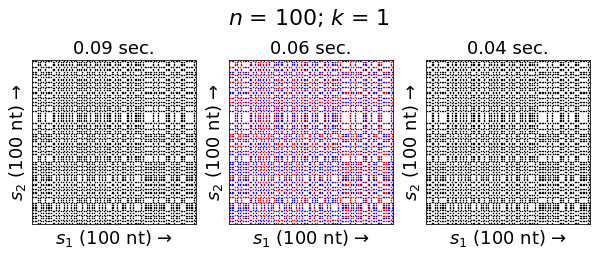

In [5]:
%memit sim(100, 1, incl_fb=True)

binary = True...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.00s: Found 657 forward match cell(s).
0.00s: Computing ReverseComplement(s2)...
0.01s: Finding reverse-complementary matches between s1 and s2...
0.01s: Found 1,125 total (fwd and/or RC) match cell(s).
0.01s: Dot plot matrix density = 11.48%.
0.01s: Converting match information to COO format inputs...
0.01s: Creating sparse matrix from COO format inputs...
0.01s: Done creating the matrix.
Matrix construction took 0.01 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.00s: Found 657 forward match cell(s).
0.01s: Computing ReverseComplement(s2)...
0.01s: Finding reverse-complementary matches between s1 and s2...
0.01s: Found 1,125 total (fwd and/or RC) match ce

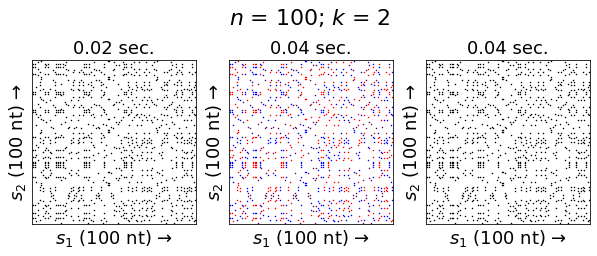

In [6]:
%memit sim(100, 2, incl_fb=True)

binary = True...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.00s: Found 145 forward match cell(s).
0.00s: Computing ReverseComplement(s2)...
0.00s: Finding reverse-complementary matches between s1 and s2...
0.01s: Found 267 total (fwd and/or RC) match cell(s).
0.01s: Dot plot matrix density = 2.78%.
0.01s: Converting match information to COO format inputs...
0.01s: Creating sparse matrix from COO format inputs...
0.01s: Done creating the matrix.
Matrix construction took 0.01 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.00s: Found 145 forward match cell(s).
0.00s: Computing ReverseComplement(s2)...
0.00s: Finding reverse-complementary matches between s1 and s2...
0.01s: Found 267 total (fwd and/or RC) match cell(s)

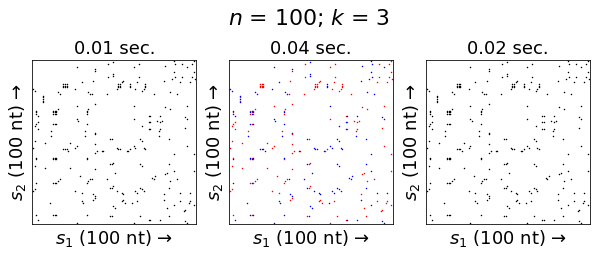

In [7]:
%memit sim(100, 3, incl_fb=True)

# 500 x 500

binary = True...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.15s: Found 62,526 forward match cell(s).
0.15s: Computing ReverseComplement(s2)...
0.15s: Finding reverse-complementary matches between s1 and s2...
0.31s: Found 124,904 total (fwd and/or RC) match cell(s).
0.31s: Dot plot matrix density = 49.96%.
0.31s: Converting match information to COO format inputs...
0.36s: Creating sparse matrix from COO format inputs...
0.39s: Done creating the matrix.
Matrix construction took 0.40 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.15s: Found 62,526 forward match cell(s).
0.15s: Computing ReverseComplement(s2)...
0.15s: Finding reverse-complementary matches between s1 and s2...
0.31s: Found 124,904 total (fwd and/or RC

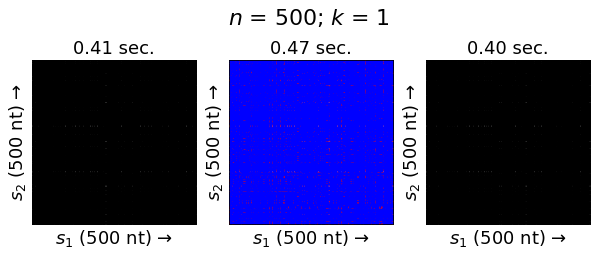

In [8]:
%memit sim(500, 1, incl_fb=True)

binary = True...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.05s: Found 15,501 forward match cell(s).
0.05s: Computing ReverseComplement(s2)...
0.05s: Finding reverse-complementary matches between s1 and s2...
0.09s: Found 27,478 total (fwd and/or RC) match cell(s).
0.09s: Dot plot matrix density = 11.04%.
0.09s: Converting match information to COO format inputs...
0.10s: Creating sparse matrix from COO format inputs...
0.11s: Done creating the matrix.
Matrix construction took 0.12 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.04s: Found 15,501 forward match cell(s).
0.04s: Computing ReverseComplement(s2)...
0.05s: Finding reverse-complementary matches between s1 and s2...
0.09s: Found 27,478 total (fwd and/or RC) 

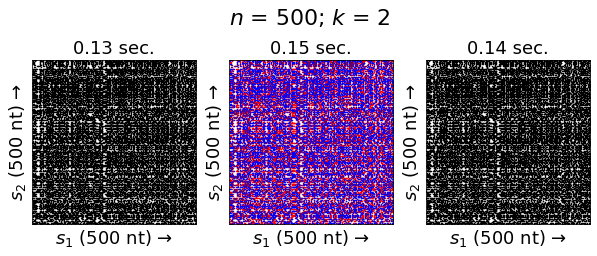

In [9]:
%memit sim(500, 2, incl_fb=True)

binary = True...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.01s: Found 237 forward match cell(s).
0.01s: Computing ReverseComplement(s2)...
0.01s: Finding reverse-complementary matches between s1 and s2...
0.01s: Found 476 total (fwd and/or RC) match cell(s).
0.01s: Dot plot matrix density = 0.19%.
0.01s: Converting match information to COO format inputs...
0.02s: Creating sparse matrix from COO format inputs...
0.02s: Done creating the matrix.
Matrix construction took 0.02 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.01s: Found 237 forward match cell(s).
0.01s: Computing ReverseComplement(s2)...
0.01s: Finding reverse-complementary matches between s1 and s2...
0.02s: Found 476 total (fwd and/or RC) match cell(s)

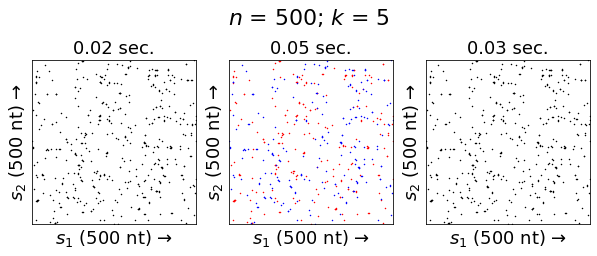

In [10]:
%memit sim(500, 5, incl_fb=True)

# 1,000 x 1,000

binary = True...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.21s: Found 62,688 forward match cell(s).
0.21s: Computing ReverseComplement(s2)...
0.21s: Finding reverse-complementary matches between s1 and s2...
0.38s: Found 109,544 total (fwd and/or RC) match cell(s).
0.38s: Dot plot matrix density = 10.98%.
0.38s: Converting match information to COO format inputs...
0.43s: Creating sparse matrix from COO format inputs...
0.47s: Done creating the matrix.
Matrix construction took 0.47 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.15s: Found 62,688 forward match cell(s).
0.15s: Computing ReverseComplement(s2)...
0.15s: Finding reverse-complementary matches between s1 and s2...
0.32s: Found 109,544 total (fwd and/or RC

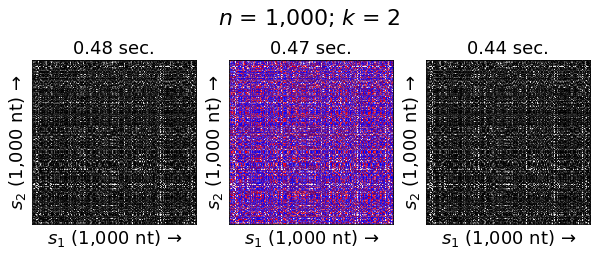

In [11]:
%memit sim(1000, 2, markersize=0.1, incl_fb=True)

binary = True...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.05s: Found 15,724 forward match cell(s).
0.05s: Computing ReverseComplement(s2)...
0.05s: Finding reverse-complementary matches between s1 and s2...
0.10s: Found 31,471 total (fwd and/or RC) match cell(s).
0.10s: Dot plot matrix density = 3.16%.
0.10s: Converting match information to COO format inputs...
0.12s: Creating sparse matrix from COO format inputs...
0.13s: Done creating the matrix.
Matrix construction took 0.14 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.02s: Done.
Visualization took 0.02 sec.
binary = False...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.05s: Found 15,724 forward match cell(s).
0.05s: Computing ReverseComplement(s2)...
0.06s: Finding reverse-complementary matches between s1 and s2...
0.11s: Found 31,471 total (fwd and/or RC) m

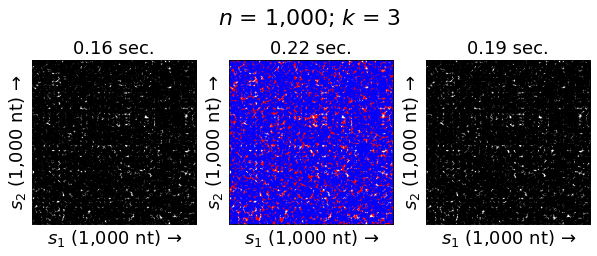

In [12]:
%memit sim(1000, 3, markersize=1, incl_fb=True)

binary = True...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.01s: Found 955 forward match cell(s).
0.01s: Computing ReverseComplement(s2)...
0.01s: Finding reverse-complementary matches between s1 and s2...
0.02s: Found 1,985 total (fwd and/or RC) match cell(s).
0.02s: Dot plot matrix density = 0.20%.
0.02s: Converting match information to COO format inputs...
0.02s: Creating sparse matrix from COO format inputs...
0.02s: Done creating the matrix.
Matrix construction took 0.03 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.01s: Found 955 forward match cell(s).
0.01s: Computing ReverseComplement(s2)...
0.01s: Finding reverse-complementary matches between s1 and s2...
0.02s: Found 1,985 total (fwd and/or RC) match cel

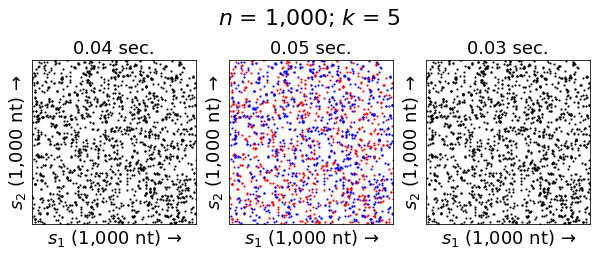

In [13]:
%memit sim(1000, 5, markersize=1, incl_fb=True)

binary = True...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.01s: Found 1 forward match cell(s).
0.01s: Computing ReverseComplement(s2)...
0.01s: Finding reverse-complementary matches between s1 and s2...
0.02s: Found 1 total (fwd and/or RC) match cell(s).
0.02s: Dot plot matrix density = 0.00%.
0.02s: Converting match information to COO format inputs...
0.02s: Creating sparse matrix from COO format inputs...
0.02s: Done creating the matrix.
Matrix construction took 0.02 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.00s: Found 1 forward match cell(s).
0.01s: Computing ReverseComplement(s2)...
0.01s: Finding reverse-complementary matches between s1 and s2...
0.01s: Found 1 total (fwd and/or RC) match cell(s).
0.02s:

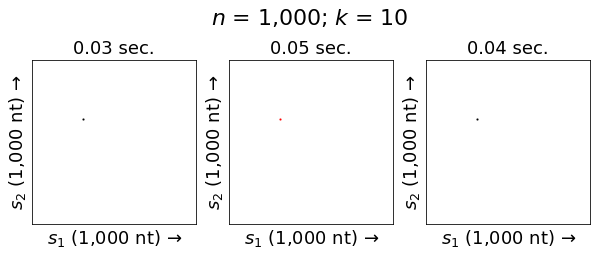

In [14]:
%memit sim(1000, 10, markersize=1, incl_fb=True)

# 10,000 x 10,000

binary = True...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.27s: Found 97,019 forward match cell(s).
0.27s: Computing ReverseComplement(s2)...
0.27s: Finding reverse-complementary matches between s1 and s2...
0.54s: Found 194,413 total (fwd and/or RC) match cell(s).
0.54s: Dot plot matrix density = 0.19%.
0.54s: Converting match information to COO format inputs...
0.62s: Creating sparse matrix from COO format inputs...
0.68s: Done creating the matrix.
Matrix construction took 0.69 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.25s: Found 97,019 forward match cell(s).
0.25s: Computing ReverseComplement(s2)...
0.25s: Finding reverse-complementary matches between s1 and s2...
0.52s: Found 194,413 total (fwd and/or RC)

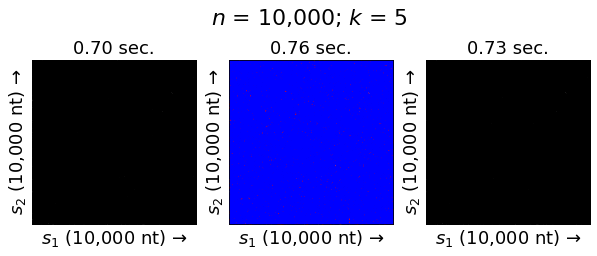

In [15]:
%memit sim(10000, 5, incl_fb=True)

binary = True...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.03s: Found 108 forward match cell(s).
0.03s: Computing ReverseComplement(s2)...
0.03s: Finding reverse-complementary matches between s1 and s2...
0.05s: Found 197 total (fwd and/or RC) match cell(s).
0.05s: Dot plot matrix density = 0.00%.
0.05s: Converting match information to COO format inputs...
0.05s: Creating sparse matrix from COO format inputs...
0.05s: Done creating the matrix.
Matrix construction took 0.05 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.02s: Found 108 forward match cell(s).
0.02s: Computing ReverseComplement(s2)...
0.02s: Finding reverse-complementary matches between s1 and s2...
0.03s: Found 197 total (fwd and/or RC) match cell(s)

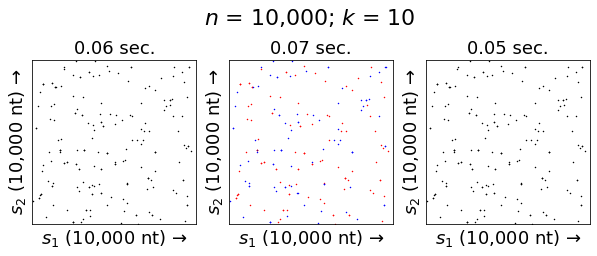

In [16]:
%memit sim(10000, 10, incl_fb=True)

binary = True...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.02s: Found 0 forward match cell(s).
0.02s: Computing ReverseComplement(s2)...
0.02s: Finding reverse-complementary matches between s1 and s2...
0.03s: Found 0 total (fwd and/or RC) match cell(s).
0.03s: Dot plot matrix density = 0.00%.
0.03s: Converting match information to COO format inputs...
0.04s: Creating sparse matrix from COO format inputs...
0.04s: Done creating the matrix.
Matrix construction took 0.04 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: Validating inputs...
0.00s: Finding forward matches between s1 and s2...
0.02s: Found 0 forward match cell(s).
0.02s: Computing ReverseComplement(s2)...
0.02s: Finding reverse-complementary matches between s1 and s2...
0.03s: Found 0 total (fwd and/or RC) match cell(s).
0.04s:

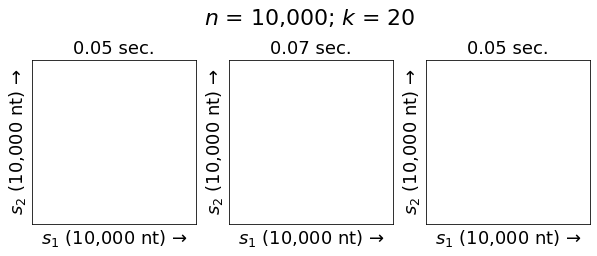

In [17]:
%memit sim(10000, 20, incl_fb=True)

# 100,000 x 100,000

i'm gonna stop including the `force_binary` test (`incl_fb`) here, since i think we've already shown by now that it works to speed up the visualization and the tests from here on are gonna start taking longer and longer

In [ ]:
%memit sim(100000, 5, markersize=0.01)

binary = True...
0.01s: Validating inputs...
0.02s: Finding forward matches between s1 and s2...
22.49s: Found 9,765,429 forward match cell(s).
22.50s: Computing ReverseComplement(s2)...
22.50s: Finding reverse-complementary matches between s1 and s2...


^^^ Note that this test sometimes crashes Jupyter (I got it to run once by closing most of the other tabs / processes I had running on my computer, then rerunning it). I think it's because $k = 5$ is an extremely small value of $k$ to use when we have sequences this big.

Since there are only $4^5 = 1,024$ possible $5$-mers, the number of random matches in a very large dot plot matrix will increase, causing the matrix to become relatively dense -- and thus require a lot of memory to store. If we need to store $100{,}000^2$ `int`s in memory, and one `int` takes up 1 byte (this is an underestimate -- apparently `int`s in python [generally take up 4 bytes](http://projectpython.net/chapter02/#integer-types)), then we need $10{,}000{,}000{,}000$ bytes of memory (aka 10 GB). This is just out of range for my laptop with 8 GB of RAM!

The other side of the coin is that -- since there are so few possible 5-mers, relatively speaking -- $k = 5$ dot plots are probably not going to be very useful for long sequences, anyway (as we saw above with the $k = 5$ dot plots of two 100,000 nt sequences). Let's try $k = 10$, instead?

binary = True...
0.00s: Validating inputs...
0.01s: Finding forward matches between s1 and s2...
0.16s: Found 9,589 forward match cell(s).
0.16s: Computing ReverseComplement(s2)...
0.16s: Finding reverse-complementary matches between s1 and s2...
0.32s: Found 19,204 total (fwd and/or RC) match cell(s).
0.32s: Dot plot matrix density = 0.00%.
0.32s: Converting match information to COO format inputs...
0.33s: Creating sparse matrix from COO format inputs...
0.34s: Done creating the matrix.
Matrix construction took 0.34 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: Validating inputs...
0.01s: Finding forward matches between s1 and s2...
0.16s: Found 9,589 forward match cell(s).
0.16s: Computing ReverseComplement(s2)...
0.16s: Finding reverse-complementary matches between s1 and s2...
0.32s: Found 19,204 total (fwd and/or RC) mat

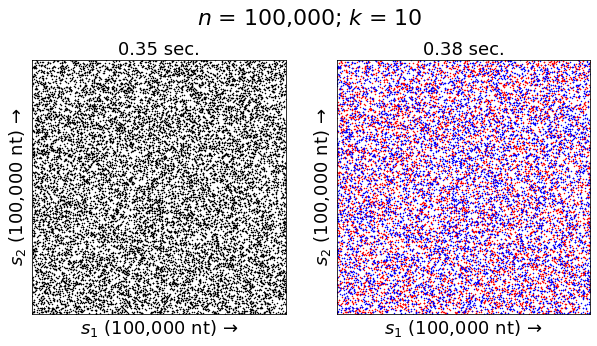

In [19]:
%memit sim(100000, 10)

Yep, this poor computer can handle that much easier.

binary = True...
0.00s: Validating inputs...
0.01s: Finding forward matches between s1 and s2...
0.14s: Found 1 forward match cell(s).
0.14s: Computing ReverseComplement(s2)...
0.14s: Finding reverse-complementary matches between s1 and s2...
0.25s: Found 1 total (fwd and/or RC) match cell(s).
0.26s: Dot plot matrix density = 0.00%.
0.26s: Converting match information to COO format inputs...
0.26s: Creating sparse matrix from COO format inputs...
0.26s: Done creating the matrix.
Matrix construction took 0.26 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: Validating inputs...
0.01s: Finding forward matches between s1 and s2...
0.13s: Found 1 forward match cell(s).
0.13s: Computing ReverseComplement(s2)...
0.13s: Finding reverse-complementary matches between s1 and s2...
0.24s: Found 1 total (fwd and/or RC) match cell(s).
0.24s:

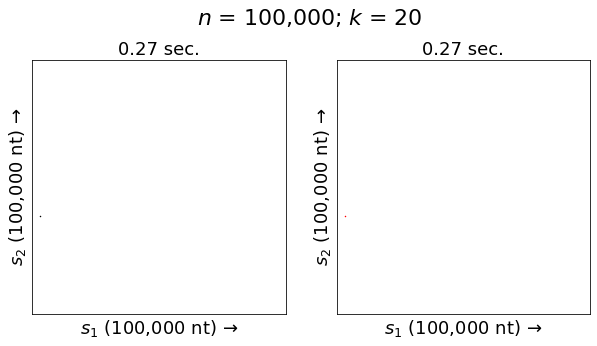

In [20]:
%memit sim(100000, 20)

# 1,000,000 x 1,000,000

binary = True...
0.00s: Validating inputs...
0.10s: Finding forward matches between s1 and s2...
4.30s: Found 953,210 forward match cell(s).
4.30s: Computing ReverseComplement(s2)...
4.30s: Finding reverse-complementary matches between s1 and s2...
8.85s: Found 1,905,740 total (fwd and/or RC) match cell(s).
8.85s: Dot plot matrix density = 0.00%.
8.85s: Converting match information to COO format inputs...
10.19s: Creating sparse matrix from COO format inputs...
11.09s: Done creating the matrix.
Matrix construction took 11.21 sec.
0.00s: Visualizing all match cells with spy()...
0.08s: Done visualizing all match cells.
0.08s: Slightly restyling the visualization...
0.08s: Done.
Visualization took 0.08 sec.
binary = False...
0.00s: Validating inputs...
0.10s: Finding forward matches between s1 and s2...
4.37s: Found 953,210 forward match cell(s).
4.37s: Computing ReverseComplement(s2)...
4.37s: Finding reverse-complementary matches between s1 and s2...
8.73s: Found 1,905,740 total (fwd a

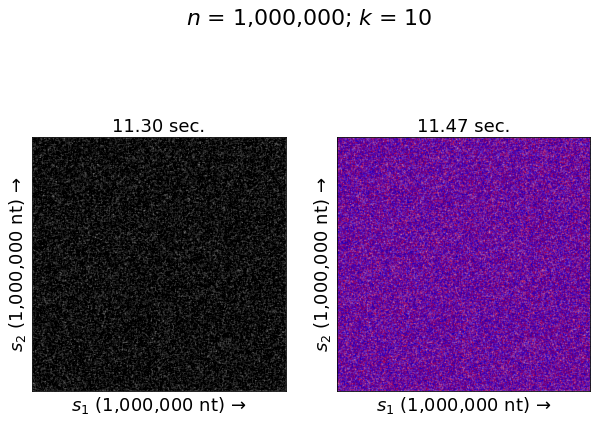

In [22]:
%memit sim(1000000, 10, markersize=0.005, fig_size_inches=(10, 10))

Yep, this is much easier for wotplot to handle. And using a larger _k_ means that the plots will probably be more informative, anyway :)

binary = True...
0.00s: Validating inputs...
0.09s: Finding forward matches between s1 and s2...
1.16s: Found 1 forward match cell(s).
1.16s: Computing ReverseComplement(s2)...
1.17s: Finding reverse-complementary matches between s1 and s2...
2.15s: Found 3 total (fwd and/or RC) match cell(s).
2.15s: Dot plot matrix density = 0.00%.
2.15s: Converting match information to COO format inputs...
2.15s: Creating sparse matrix from COO format inputs...
2.15s: Done creating the matrix.
Matrix construction took 2.15 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: Validating inputs...
0.11s: Finding forward matches between s1 and s2...
1.08s: Found 1 forward match cell(s).
1.08s: Computing ReverseComplement(s2)...
1.09s: Finding reverse-complementary matches between s1 and s2...
2.07s: Found 3 total (fwd and/or RC) match cell(s).
2.07s:

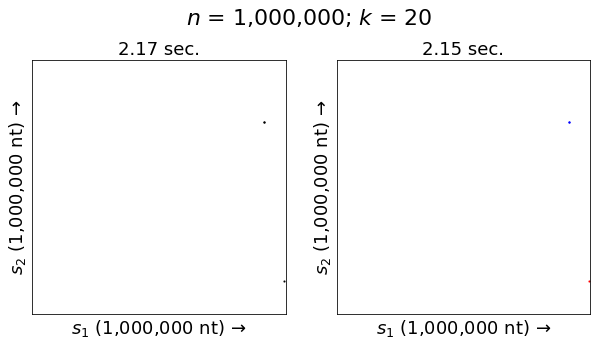

In [23]:
%memit sim(1000000, 20, markersize=1)

# 2,000,000 x 2,000,000

binary = True...
Matrix construction took 4.26 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
Matrix construction took 4.31 sec.
0.00s: Visualizing "1" cells with spy()...
0.04s: Done visualizing "1" cells.
0.04s: Visualizing "-1" cells with spy()...
0.07s: Done visualizing "-1" cells.
0.07s: Visualizing "2" cells with spy()...
0.11s: Done visualizing "2" cells.
0.11s: Slightly restyling the visualization...
0.11s: Done.
Visualization took 0.11 sec.
Total time taken: 8.68 sec.
peak memory: 662.76 MiB, increment: 561.01 MiB


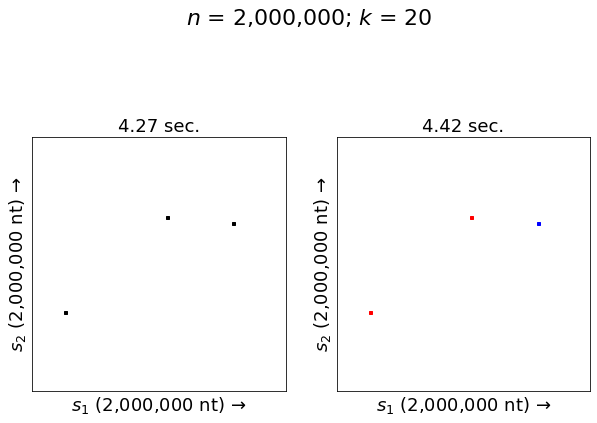

In [6]:
%memit sim(2000000, 20, markersize=3, fig_size_inches=(10, 10))

# some other stuff while i try to figure out how the memory requirements grow

binary = True...
Matrix construction took 5.12 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
Matrix construction took 5.21 sec.
0.00s: Visualizing "1" cells with spy()...
0.04s: Done visualizing "1" cells.
0.04s: Visualizing "-1" cells with spy()...
0.08s: Done visualizing "-1" cells.
0.08s: Visualizing "2" cells with spy()...
0.12s: Done visualizing "2" cells.
0.12s: Slightly restyling the visualization...
0.12s: Done.
Visualization took 0.12 sec.
Total time taken: 10.45 sec.
peak memory: 808.40 MiB, increment: 627.28 MiB


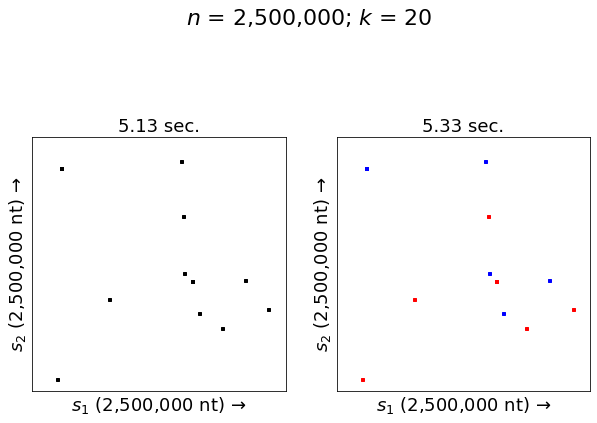

In [9]:
%memit sim(2500000, 20, markersize=3, fig_size_inches=(10, 10))

binary = True...
Matrix construction took 6.25 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.00s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
Matrix construction took 6.25 sec.
0.00s: Visualizing "1" cells with spy()...
0.05s: Done visualizing "1" cells.
0.05s: Visualizing "-1" cells with spy()...
0.09s: Done visualizing "-1" cells.
0.09s: Visualizing "2" cells with spy()...
0.14s: Done visualizing "2" cells.
0.14s: Slightly restyling the visualization...
0.14s: Done.
Visualization took 0.14 sec.
Total time taken: 12.64 sec.
peak memory: 946.15 MiB, increment: 742.33 MiB


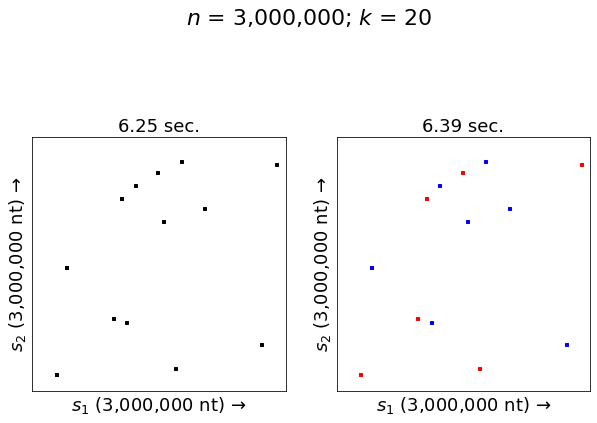

In [10]:
%memit sim(3000000, 20, markersize=3, fig_size_inches=(10, 10))

binary = True...
Matrix construction took 7.46 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.00s: Slightly restyling the visualization...
0.00s: Done.
Visualization took 0.01 sec.
binary = False...
Matrix construction took 7.33 sec.
0.00s: Visualizing "1" cells with spy()...
0.05s: Done visualizing "1" cells.
0.05s: Visualizing "-1" cells with spy()...
0.10s: Done visualizing "-1" cells.
0.10s: Visualizing "2" cells with spy()...
0.15s: Done visualizing "2" cells.
0.15s: Slightly restyling the visualization...
0.15s: Done.
Visualization took 0.15 sec.
Total time taken: 14.95 sec.
peak memory: 1100.48 MiB, increment: 887.74 MiB


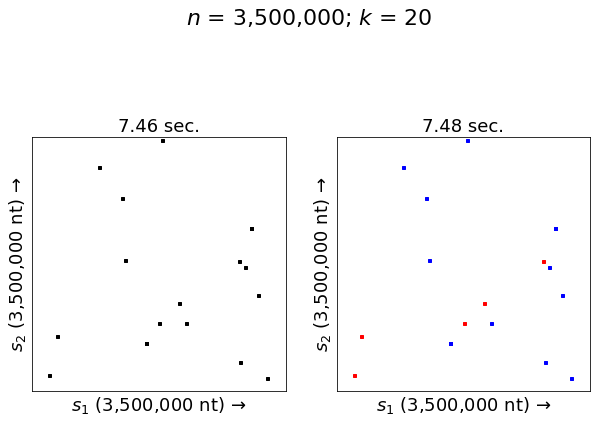

In [11]:
%memit sim(3500000, 20, markersize=3, fig_size_inches=(10, 10))

binary = True...
Matrix construction took 8.72 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.00s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
Matrix construction took 8.81 sec.
0.00s: Visualizing "1" cells with spy()...
0.06s: Done visualizing "1" cells.
0.06s: Visualizing "-1" cells with spy()...
0.11s: Done visualizing "-1" cells.
0.11s: Visualizing "2" cells with spy()...
0.17s: Done visualizing "2" cells.
0.17s: Slightly restyling the visualization...
0.17s: Done.
Visualization took 0.17 sec.
Total time taken: 17.71 sec.
peak memory: 1253.46 MiB, increment: 1031.39 MiB


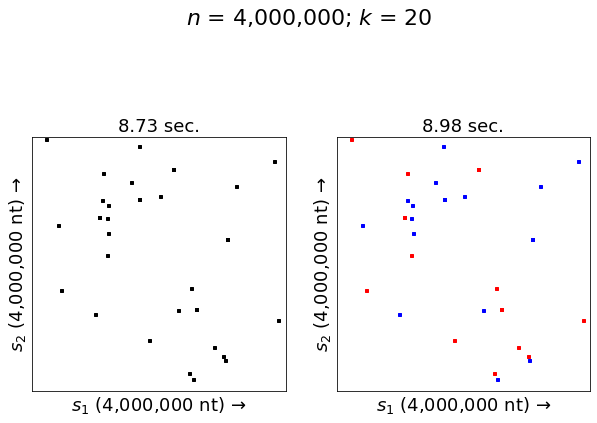

In [12]:
%memit sim(4000000, 20, markersize=3, fig_size_inches=(10, 10))

binary = True...
Matrix construction took 9.86 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.00s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
Matrix construction took 9.78 sec.
0.00s: Visualizing "1" cells with spy()...
0.07s: Done visualizing "1" cells.
0.07s: Visualizing "-1" cells with spy()...
0.13s: Done visualizing "-1" cells.
0.13s: Visualizing "2" cells with spy()...
0.19s: Done visualizing "2" cells.
0.19s: Slightly restyling the visualization...
0.19s: Done.
Visualization took 0.19 sec.
Total time taken: 19.84 sec.
peak memory: 1382.60 MiB, increment: 1152.11 MiB


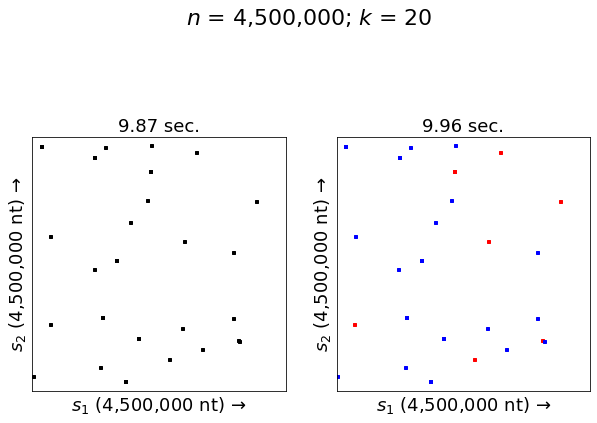

In [13]:
%memit sim(4500000, 20, markersize=3, fig_size_inches=(10, 10))

# 5,000,000 x 5,000,000

binary = True...
Matrix construction took 12.11 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
Matrix construction took 11.73 sec.
0.00s: Visualizing "1" cells with spy()...
0.06s: Done visualizing "1" cells.
0.06s: Visualizing "-1" cells with spy()...
0.14s: Done visualizing "-1" cells.
0.14s: Visualizing "2" cells with spy()...
0.21s: Done visualizing "2" cells.
0.21s: Slightly restyling the visualization...
0.21s: Done.
Visualization took 0.21 sec.
Total time taken: 24.06 sec.
peak memory: 1506.46 MiB, increment: 1330.28 MiB


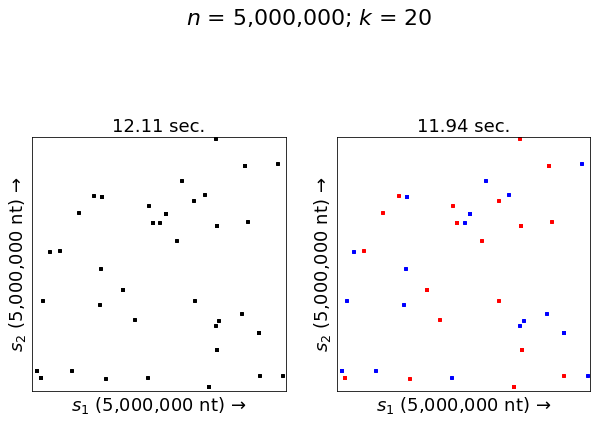

In [7]:
%memit sim(5000000, 20, markersize=3, fig_size_inches=(10, 10))

# 7,500,000 x 7,500,000

binary = True...
Matrix construction took 16.89 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.00s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
Matrix construction took 16.83 sec.
0.00s: Visualizing "1" cells with spy()...
0.12s: Done visualizing "1" cells.
0.12s: Visualizing "-1" cells with spy()...
0.22s: Done visualizing "-1" cells.
0.22s: Visualizing "2" cells with spy()...
0.33s: Done visualizing "2" cells.
0.33s: Slightly restyling the visualization...
0.33s: Done.
Visualization took 0.33 sec.
Total time taken: 34.05 sec.
peak memory: 2205.87 MiB, increment: 2040.55 MiB


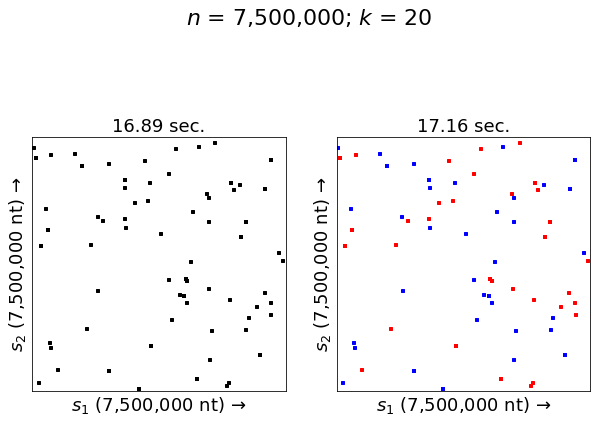

In [8]:
%memit sim(7500000, 20, markersize=3, fig_size_inches=(10, 10))

# 10,000,000 x 10,000,000

binary = True...
Matrix construction took 24.16 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
Matrix construction took 22.60 sec.
0.00s: Visualizing "1" cells with spy()...
0.15s: Done visualizing "1" cells.
0.15s: Visualizing "-1" cells with spy()...
0.29s: Done visualizing "-1" cells.
0.29s: Visualizing "2" cells with spy()...
0.43s: Done visualizing "2" cells.
0.43s: Slightly restyling the visualization...
0.43s: Done.
Visualization took 0.43 sec.
Total time taken: 47.20 sec.
peak memory: 2904.02 MiB, increment: 2666.21 MiB


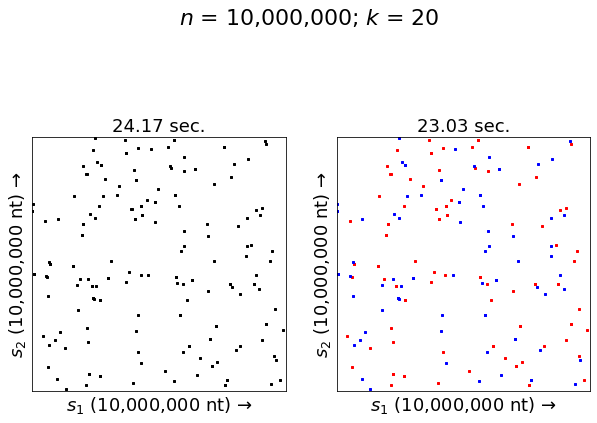

In [14]:
%memit sim(10000000, 20, markersize=2, fig_size_inches=(10, 10))

binary = True...
0.00s: Validating inputs...
0.85s: Finding forward matches between s1 and s2...
12.58s: Found 0 forward match cell(s).
12.58s: Computing ReverseComplement(s2)...
12.61s: Finding reverse-complementary matches between s1 and s2...
23.93s: Found 0 total (fwd and/or RC) match cell(s).
23.93s: Dot plot matrix density = 0.00%.
23.94s: Converting match information to COO format inputs...
23.94s: Creating sparse matrix from COO format inputs...
23.94s: Done creating the matrix.
Matrix construction took 23.94 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: Validating inputs...
0.80s: Finding forward matches between s1 and s2...
11.92s: Found 0 forward match cell(s).
11.92s: Computing ReverseComplement(s2)...
11.95s: Finding reverse-complementary matches between s1 and s2...
23.12s: Found 0 total (fwd and/or RC) match ce

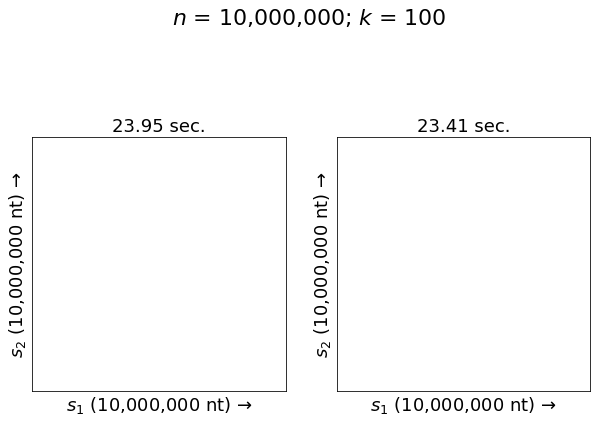

In [26]:
%memit sim(10000000, 100, markersize=3, fig_size_inches=(10, 10))

# Trying to figure out where exactly Jupyter notebook crashes with the new method

(Since the laptop I'm testing this on has ~8 GB of RAM, presumably this is when the peak memory gets too close to somewhere around there.)

binary = True...
Matrix construction took 73.73 sec.
0.00s: Visualizing all match cells with spy()...
0.16s: Done visualizing all match cells.
0.16s: Slightly restyling the visualization...
0.17s: Done.
Visualization took 0.27 sec.
binary = False...
Matrix construction took 49.00 sec.
0.00s: Visualizing "1" cells with spy()...
0.28s: Done visualizing "1" cells.
0.28s: Visualizing "-1" cells with spy()...
0.53s: Done visualizing "-1" cells.
0.53s: Visualizing "2" cells with spy()...
0.77s: Done visualizing "2" cells.
0.77s: Slightly restyling the visualization...
0.77s: Done.
Visualization took 0.77 sec.
Total time taken: 123.77 sec.
peak memory: 5579.32 MiB, increment: 5361.40 MiB


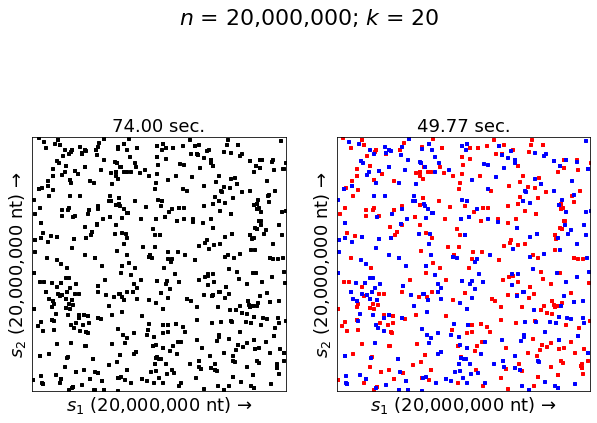

In [16]:
%memit sim(20000000, 20, markersize=3, fig_size_inches=(10, 10))

So far, so good...

In [ ]:
%memit sim(25000000, 20, markersize=3, fig_size_inches=(10, 10))

binary = True...


Okay, cool, that killed it.

# 100,000,000 x 100,000,000

In [ ]:
%memit sim(100000000, 20, markersize=2, fig_size_inches=(10, 10))

binary = True...
0.00s: Validating inputs...
7.39s: Finding forward matches between s1 and s2...


Okay, the new method crashes Jupyter (on my laptop). But the suffix array only method doesn't -- interesting.